In [36]:
!pip install pandas seaborn matplotlib plotly



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [38]:
# Load the data
file_path = r'C:\Users\n.rennie\Documents\project 3\Project_03\healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

In [39]:
# Display the first few rows of the dataset
print(data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


## Data Cleaning and Preparation process - Jelena Raonic 

In [40]:
# Create a DataFrame for the healthcare-dataset-stroke-data.csv. 
file_path = Path = r'C:\Users\n.rennie\Documents\project 3\Project_03\healthcare-dataset-stroke-data.csv'
stroke_df = pd.read_csv(file_path)
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [41]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [42]:
# determine the number of rows and columns.
stroke_df_rc, stroke_df_cc = stroke_df.shape
print('Number of total rows:', stroke_df_rc)
print('Number of total columns:', stroke_df_cc)

Number of total rows: 5110
Number of total columns: 12


In [43]:
# Check all columns inside of the DataFrame
stroke_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [44]:
# Show missing values
print(stroke_df.isnull().sum())
print("Overall there are", sum(stroke_df.isnull().sum()), "missing values in bmi column")

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
Overall there are 201 missing values in bmi column


In [45]:
# show duplicates
duplicate = stroke_df[stroke_df.duplicated()]
print("Duplicate Rows:", len(duplicate), "\n")

Duplicate Rows: 0 



In [46]:
# explore the 'bmi' columns
stroke_df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [47]:
# Drop all rows with missing information 
stroke_df = stroke_df.dropna(how='any')

In [48]:
# Drop the  ID column
stroke_df = stroke_df.drop(columns = ['id'])

In [49]:
stroke_df.count()

gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [50]:
# print out columns and number of unique values
for col in stroke_df.columns:
    print(col, stroke_df[col].nunique())

gender 3
age 104
hypertension 2
heart_disease 2
ever_married 2
work_type 5
Residence_type 2
avg_glucose_level 3852
bmi 418
smoking_status 4
stroke 2


In [51]:
# Count the number of 'Other' instances in 'gender' 
other_gender_count = (stroke_df['gender'] == 'Other').sum()

print(f'In this dataset there is other gender:', {other_gender_count})

In this dataset there is other gender: {1}


In [52]:
# Drop the row with 'Other' for 'gender'
stroke_df = stroke_df[stroke_df['gender'] != 'Other']

In [53]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


In [54]:
stroke_df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [55]:
# look at statistical overview of the DataFrame
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


## Visualization Options 

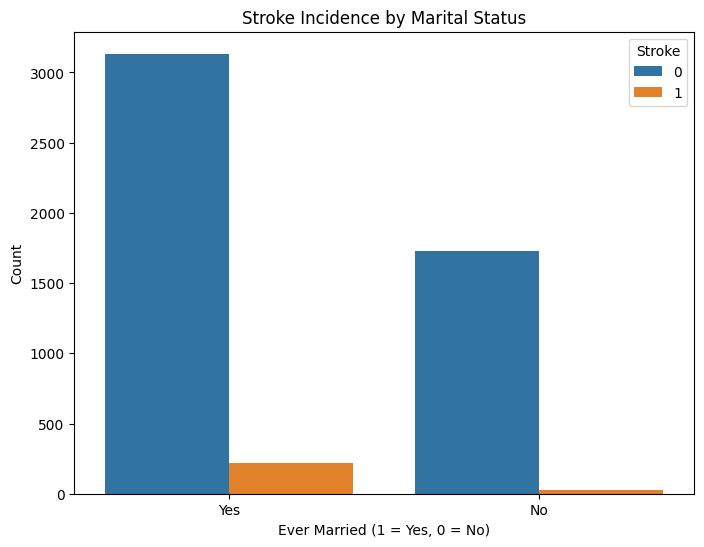

In [56]:
# Visualization 1: Stroke Incidence by Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='ever_married', hue='stroke')
plt.title('Stroke Incidence by Marital Status')
plt.xlabel('Ever Married (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

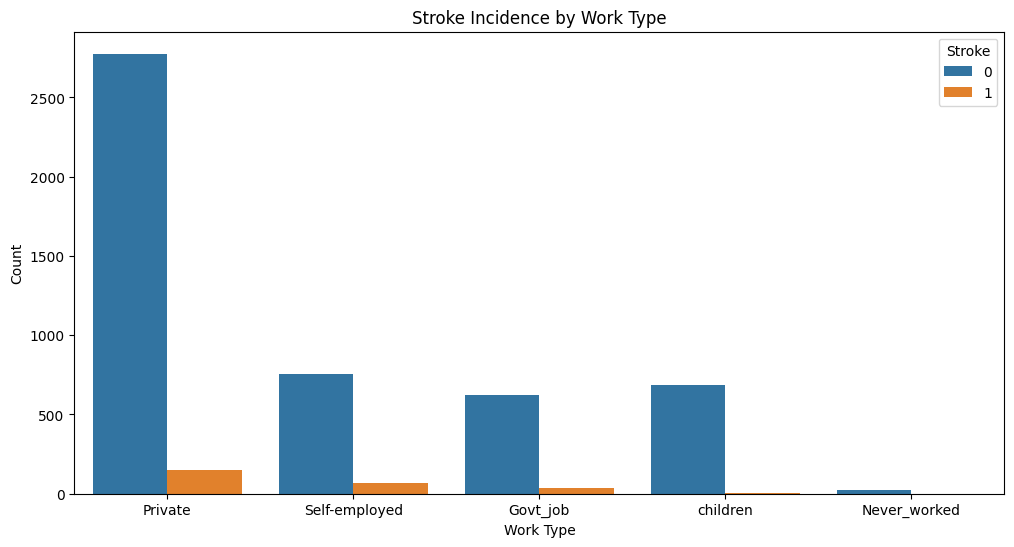

In [57]:
# Visualization 2: Stroke Incidence by Work Type
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='work_type', hue='stroke')
plt.title('Stroke Incidence by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()


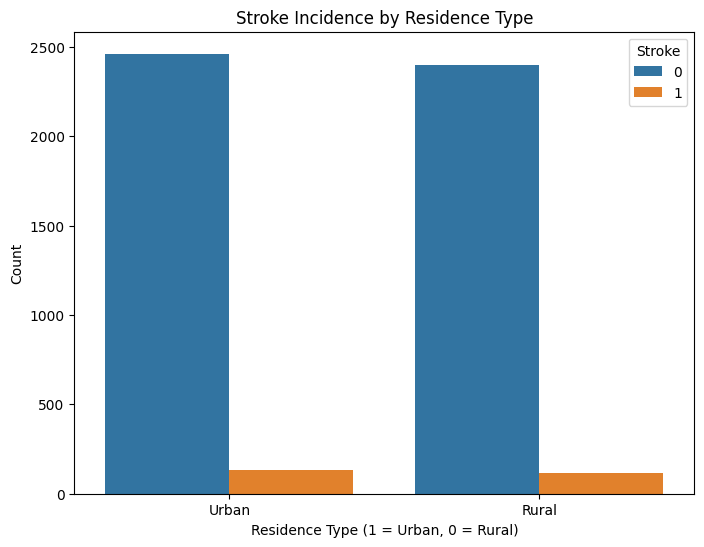

In [58]:
# Visualization 3: Stroke Incidence by Residence Type
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Residence_type', hue='stroke')
plt.title('Stroke Incidence by Residence Type')
plt.xlabel('Residence Type (1 = Urban, 0 = Rural)')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

### Visualization of all three Lifestyle categories - Heat Map

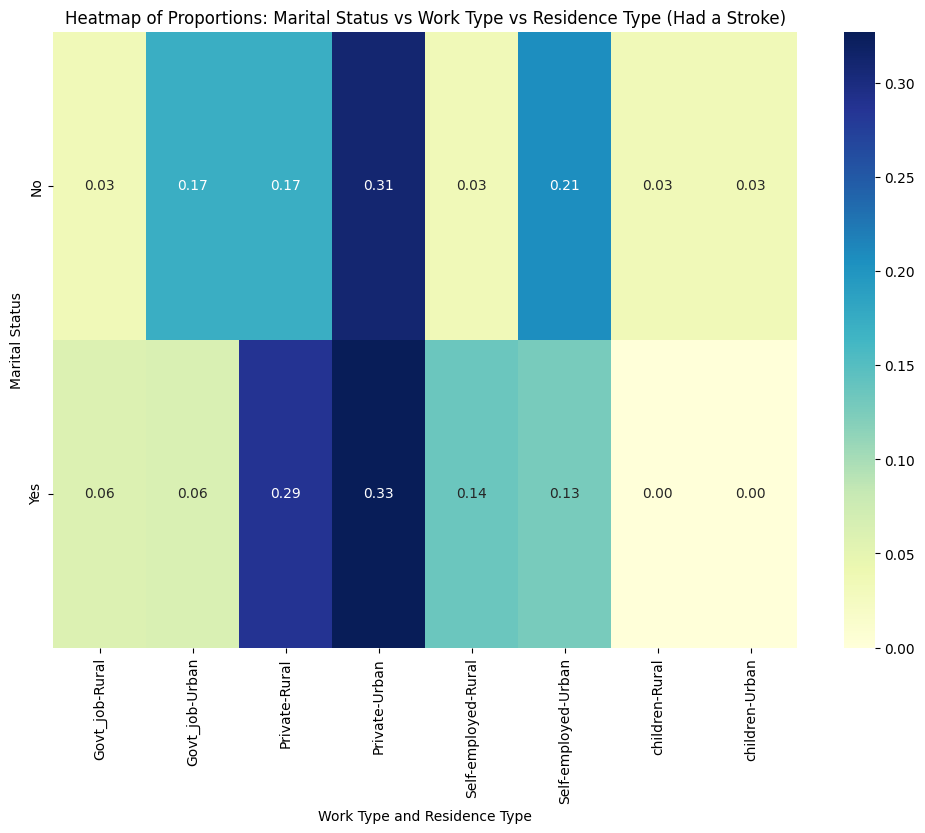

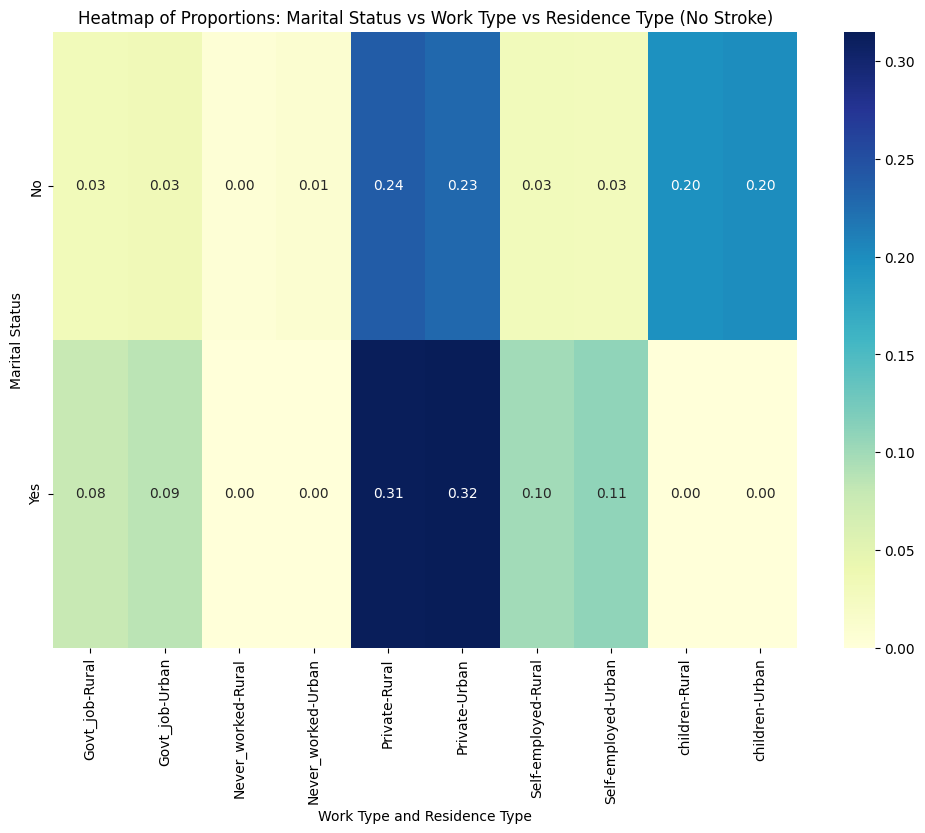

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Separate the data into two groups: those who had a stroke and those who did not
data_stroke = data[data['stroke'] == 1]
data_no_stroke = data[data['stroke'] == 0]

# Calculate proportions for those who had a stroke
ct_prop_stroke = pd.crosstab(index=data_stroke['ever_married'], columns=[data_stroke['work_type'], data_stroke['Residence_type']], normalize='index')

# Calculate proportions for those who did not have a stroke
ct_prop_no_stroke = pd.crosstab(index=data_no_stroke['ever_married'], columns=[data_no_stroke['work_type'], data_no_stroke['Residence_type']], normalize='index')

# Plotting the heatmap for those who had a stroke
plt.figure(figsize=(12, 8))
sns.heatmap(ct_prop_stroke, annot=True, cmap='YlGnBu', cbar=True, fmt='.2f')
plt.title('Heatmap of Proportions: Marital Status vs Work Type vs Residence Type (Had a Stroke)')
plt.xlabel('Work Type and Residence Type')
plt.ylabel('Marital Status')
plt.show()

# Plotting the heatmap for those who did not have a stroke
plt.figure(figsize=(12, 8))
sns.heatmap(ct_prop_no_stroke, annot=True, cmap='YlGnBu', cbar=True, fmt='.2f')
plt.title('Heatmap of Proportions: Marital Status vs Work Type vs Residence Type (No Stroke)')
plt.xlabel('Work Type and Residence Type')
plt.ylabel('Marital Status')
plt.show()



### Convert DataFrames to JSON and Export

In [60]:
import json

# Convert DataFrames to JSON
ct_prop_stroke_json = ct_prop_stroke.to_json(orient='split')
ct_prop_no_stroke_json = ct_prop_no_stroke.to_json(orient='split')

# Display the JSON data as strings to embed in the HTML cell
print("ct_prop_stroke_json = ", ct_prop_stroke_json)
print("ct_prop_no_stroke_json = ", ct_prop_no_stroke_json)



ct_prop_stroke_json =  {"columns":[["Govt_job","Rural"],["Govt_job","Urban"],["Private","Rural"],["Private","Urban"],["Self-employed","Rural"],["Self-employed","Urban"],["children","Rural"],["children","Urban"]],"index":["No","Yes"],"data":[[0.0344827586,0.1724137931,0.1724137931,0.3103448276,0.0344827586,0.2068965517,0.0344827586,0.0344827586],[0.0590909091,0.0636363636,0.2863636364,0.3272727273,0.1363636364,0.1272727273,0.0,0.0]]}
ct_prop_no_stroke_json =  {"columns":[["Govt_job","Rural"],["Govt_job","Urban"],["Never_worked","Rural"],["Never_worked","Urban"],["Private","Rural"],["Private","Urban"],["Self-employed","Rural"],["Self-employed","Urban"],["children","Rural"],["children","Urban"]],"index":["No","Yes"],"data":[[0.03125,0.0329861111,0.0040509259,0.0086805556,0.2384259259,0.228587963,0.0300925926,0.0295138889,0.1961805556,0.2002314815],[0.0778806256,0.0858601979,0.0,0.0,0.3134375997,0.3150335142,0.0989466965,0.1088413661,0.0,0.0]]}


### Embed JavaScript in HTML

In [61]:
# Read the JSON files
with open('ct_prop_stroke.json', 'r') as f:
    ct_prop_stroke_json = f.read()

with open('ct_prop_no_stroke.json', 'r') as f:
    ct_prop_no_stroke_json = f.read()

# Display the JSON data as strings to embed in the HTML cell
ct_prop_stroke_json, ct_prop_no_stroke_json


('{"columns":[["Govt_job","Rural"],["Govt_job","Urban"],["Private","Rural"],["Private","Urban"],["Self-employed","Rural"],["Self-employed","Urban"],["children","Rural"],["children","Urban"]],"index":["No","Yes"],"data":[[0.0344827586,0.1724137931,0.1724137931,0.3103448276,0.0344827586,0.2068965517,0.0344827586,0.0344827586],[0.0590909091,0.0636363636,0.2863636364,0.3272727273,0.1363636364,0.1272727273,0.0,0.0]]}',
 '{"columns":[["Govt_job","Rural"],["Govt_job","Urban"],["Never_worked","Rural"],["Never_worked","Urban"],["Private","Rural"],["Private","Urban"],["Self-employed","Rural"],["Self-employed","Urban"],["children","Rural"],["children","Urban"]],"index":["No","Yes"],"data":[[0.03125,0.0329861111,0.0040509259,0.0086805556,0.2384259259,0.228587963,0.0300925926,0.0295138889,0.1961805556,0.2002314815],[0.0778806256,0.0858601979,0.0,0.0,0.3134375997,0.3150335142,0.0989466965,0.1088413661,0.0,0.0]]}')